## Regression diagnostics & Regression robust to outliers

For the standard least-squares regression the use of an $L_{2}$ norm (mean square error) results in outliers that have substantial leverage in any fit (contributing as the square of the systematic deviation). If we knew $e(y_i|y)$ then we would simply include the error distribution when defining the likelihood. When we do not have a priori knowledge of $e(y_i|y)$, things become more difficult. An example of the latter would be the adoption of the $L_1$ norm, $\sum_i ||y_i − w_i x_i || $, which is less sensitive to outliers than the $L_2$ norm. Minimizing the $L_1$ norm is essentially finding the median. The drawback of this least absolute value regression is that there is no closed-form solution and we must
minimize the likelihood space using an iterative approach.
Other approaches to robust regression adopt an approach that seeks to reject outliers. In the astronomical community this is usually referred to as “sigma clipping” and is undertaken in an iterative manner by progressively pruning data points that are not well represented by the model.
M estimators (M stands for “maximum-likelihood-type”) approach the problem of outliers by modifying the underlying likelihood estimator to be less sensitive than the classic $L_2$ norm. M estimators are a class of estimators that include many maximum-likelihood approaches (including least squares). They replace the standard least squares, which minimizes the sum of the squares of the residuals between a data value and the model, with a different function. Ideally the M estimator has the property that it increases less than the square of the residual and has a unique minimum at zero.

In [1]:
import operator
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##################DATA#####################################
# distances in Mpc
r = [ 0.032, 0.034, 0.214, 0.263, 0.275, 0.275, 0.45, 0.5,
      0.5,   0.63,  0.8,   0.9,   0.9,   0.9,   0.9,  1.0,
      1.1,   1.1,   1.4,   1.7,   2.0,   2.0,   2.0,  2.0 , 1.6, 1.7, 1.8 ]

# velocities in km/s
v = [ +170, +290, -130, -70,  -185, -220, +200, +290,
      +270, +200, +300, -30,  +650, +150, +500, +920,
      +450, +500, +500, +960, +500, +850, +800, +1090 , - 1050 , -800, -925 ]

r_test = r[:len(r)-3] # Without the outliers
v_test = v[:len(v)-3]

R = sm.add_constant(r) #This appends a column of ones to the array if prepend==False.
R_test = sm.add_constant(r_test)

In [2]:
#Least Squares Regression
print("Complete Data sample")
model_OLS = sm.OLS(v,R)
results_OLS = model_OLS.fit()
#dfdf=dir(results) # Include available results
#print(dfdf) # Prints available results 
#print(results_OLS.resid) # Prints the residuals
print(results_OLS.summary()) # Prints summary of regression procedure
prstd, ols_lower, ols_upper = wls_prediction_std(results_OLS); #Returns std upper & lower levels

print("\n\n Inliers Data sample")
model_OLS_test = sm.OLS(v_test,R_test)
results_OLS_test = model_OLS_test.fit()
print(results_OLS_test.summary())

Complete Data sample
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7956
Date:                Sun, 05 Mar 2017   Prob (F-statistic):              0.381
Time:                        19:13:22   Log-Likelihood:                -207.45
No. Observations:                  27   AIC:                             418.9
Df Residuals:                      25   BIC:                             421.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.8637    193.60

In many cases of statistical analysis, we are not sure whether our statistical model is correctly specified. For example when using OLS, then linearity and homoscedasticity are assumed, some test statistics additionally assume that the errors are normally distributed or that we have a large sample. Since our results depend on these statistical assumptions, the results are only correct of our assumptions hold (at least approximately).

One solution to the problem of uncertainty about the correct specification is to use robust methods, for example robust regression or robust covariance (sandwich) estimators. The second approach is to test whether our sample is consistent with these assumptions.

# Normality and Distribution Tests
**jarque_bera**

$\bullet$ Tests for normal distribution of residuals

$\bullet$ printed with summary()

**omni_normtest**
    
$\bullet$ Tests for normal distribution of residuals

$\bullet$ printed with summary()

**Anderson Darling**

$\bullet$ Tests for normality with estimated mean and variance

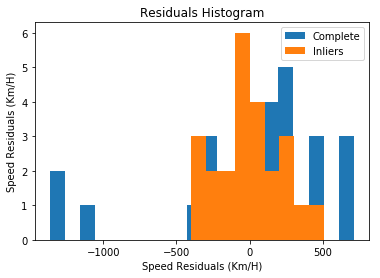

Anderson-Darling test
Complete A-D = (1.2804163431950215, 0.0020104322325534755)
Inliers A-D = (0.11135476537746669, 0.99135135088489978)


In [3]:
#Resize bins for better visualized comparisson
bn_ols=(int((max(results_OLS.resid)-min(results_OLS.resid))/100))
bn_test=(int((max(results_OLS_test.resid)-min(results_OLS_test.resid))/100))

plt.hist(results_OLS.resid,bins=bn_ols,label="Complete")
plt.hist(results_OLS_test.resid,bins=bn_test,label="Inliers")
plt.legend(loc="best")
plt.title("Residuals Histogram")
plt.xlabel("Speed Residuals (Km/H)")
plt.ylabel("Speed Residuals (Km/H)")
plt.show()

print("Anderson-Darling test")
print("Complete A-D =",sm.stats.diagnostic.normal_ad(results_OLS.resid, axis=0))
print("Inliers A-D =",sm.stats.diagnostic.normal_ad(results_OLS_test.resid, axis=0))

# Autocorrelation Tests

**durbin_watson**

$\bullet$ Durbin-Watson test for no autocorrelation of residuals

$\bullet$ printed with summary()

**acorr_ljungbox**

$\bullet$ Ljung-Box test for no autocorrelation of residuals

$\bullet$ also returns Box-Pierce statistic

**acorr_breush_godfrey**

$\bullet$ Breush-Pagan test for no autocorrelation of residuals

In [4]:
print("Complete:",sm.stats.diagnostic.acorr_breush_godfrey(results_OLS, nlags=None, store=False))
print("Inliers:",sm.stats.diagnostic.acorr_breush_godfrey(results_OLS_test, nlags=None, store=False))

Complete: (10.78773197772149, 0.21401909362656443, 1.4139866440128395, 0.25998188747701917)
Inliers: (5.1005466525349163, 0.74677751425041139, 0.47228649833585257, 0.85604748100396144)


# Non-Linearity Tests

**linear_harvey_collier**

$\bullet$ Multiplier test for Null hypothesis that linear specification is correct

**acorr_linear_rainbow**

$\bullet$ Multiplier test for Null hypothesis that linear specification is correct.

**acorr_linear_lm**

$\bullet$ Lagrange Multiplier test for Null hypothesis that linear specification is correct. This tests against specific functional alternatives.

In [5]:
# Exponential toy data
x = np.linspace(0, 2, num=30)
y = x**2
xx=sm.add_constant(x)
model_exp = sm.OLS(y,xx)
results_exp = model_exp.fit()

print("Complete:",sm.stats.diagnostic.linear_harvey_collier(results_OLS))
print("Inliers:",sm.stats.diagnostic.linear_harvey_collier(results_OLS_test))
print("Expon:",sm.stats.diagnostic.linear_harvey_collier(results_exp))

Complete: Ttest_1sampResult(statistic=-0.95670782679806821, pvalue=0.34866359198312391)
Inliers: Ttest_1sampResult(statistic=1.6124494338289508, pvalue=0.12253299105577733)
Expon: Ttest_1sampResult(statistic=6.43803001932997, pvalue=8.0311254558534854e-07)


# Heteroscedasticity Tests

For these test the null hypothesis is that all observations have the same error variance, i.e. errors are homoscedastic. The tests differ in which kind of heteroscedasticity is considered as alternative hypothesis. They also vary in the power of the test for different types of heteroscedasticity.

$\bullet$ Lagrange Multiplier Heteroscedasticity Test by Breush-Pagan

$\bullet$ Lagrange Multiplier Heteroscedasticity Test by White

$\bullet$ Test whether variance is the same in 2 subsamples

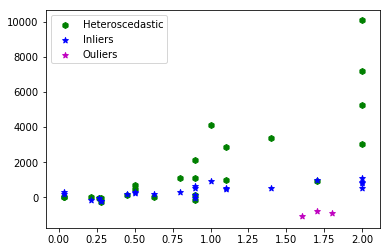

Complete sample = (6.6160974804544992, 0.010106104097373744, 8.1143655810148783, 0.0086608657791246782)
Heteroscedastic = (7.4325442032237641, 0.0064054716385020119, 9.869709294938362, 0.0047400280103331539)
Inliers = (7.361951336015693e-05, 0.99315408970752017, 6.7484760921541359e-05, 0.99351956226397453)


In [14]:
# Create sapmle with heteroscedasticity
v_heter = v_test * (r_test/np.median(r_test)*5)* np.random.rand(len(v_test))

model_OLS_heter = sm.OLS(v_heter,R_test)
results_OLS_heter = model_OLS_heter.fit()

plt.scatter(r_test,v_heter,c="g",marker="h",label="Heteroscedastic")
plt.scatter(r[:len(r)-(len(r)-len(r_test))],v[:len(r)-(len(r)-len(r_test))],c="b",marker="*",label="Inliers")
plt.scatter(r[len(r)-(len(r)-len(r_test)):],v[len(r)-(len(r)-len(r_test)):],c="m",marker="*",label="Ouliers")
plt.legend(loc="best")
plt.show()

print("Complete sample =",sm.stats.diagnostic.het_breushpagan(results_OLS.resid,R))
print("Heteroscedastic =",sm.stats.diagnostic.het_breushpagan(results_OLS_heter.resid,R_test))
print("Inliers =",sm.stats.diagnostic.het_breushpagan(results_OLS_test.resid,R_test))

# Huber loss function

An example of an M estimator that is common in robust regression is that of the Huber loss (or cost) function. The Huber estimator minimizes 

$$\sum_{i=1}^{N} e(y_1|y) $$

where $e(y_1|y)$ is modeled as 

$$\Bigg\{
  \begin{array}{rcr}
   \frac{1}{2}t^2 & if & |t| \le c \\
   c|t|-\frac{1}{2}c^2 & if & |t| \ge c \\
  \end{array} $$ 
 
  and $t =y_i-y$ with a constant $c$ that must be chosen. Therefore, $e(t)$ is a function which acts like $t^2$ for $|t| \le c $ and like $t$ for $|t| > c$ and is continuous and differentiable. The transition in the Huber function is equivalent to assuming a Gaussian error distribution for small excursions from the true value of the function and an exponential distribution for large excursions (its behavior is a compromise between the mean and the median)

In [12]:
huber_t = sm.RLM(v,R,M=sm.robust.norms.HuberT())

#model_whatever_you_like = sm.RLM(v,R, M=sm.robust.norms.Hampel())
#LeastSquares, HuberT, RamsayE, AndrewWave,TrimmedMean
        #, Hampel, and TukeyBiweight.  The default is HuberT().
#help(sm.RLM.fit) # for more options and module sm.robust.scale for scale options

results_hub = huber_t.fit()
#results_Hampel = model_whatever_you_like.fit()

print(results_hub.summary())
#print(results_Hampel.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   27
Model:                            RLM   Df Residuals:                       25
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 05 Mar 2017                                         
Time:                        19:16:15                                         
No. Iterations:                    12                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7236    110.861     -0.088      0.9

Least Squares: v(Km/s) = 145.17(±193.61) * r(Mpc) + 83.86(±193.61)
Least Squares Inliers: v(Km/s) = 454.16(± 83.44) * r(Mpc) + -40.78(±83.44)
Robust Linear: v(Km/s) = 359.67(±110.86) * r(Mpc) + -9.72(±110.86)


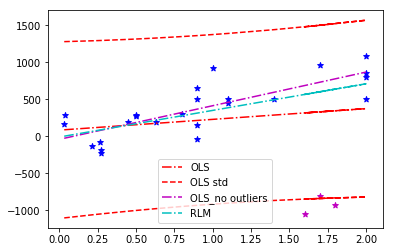

In [13]:
print("Least Squares: v(Km/s) = %.2f" % results_OLS.params[1]+"(±%.2f" % results_OLS.bse[0]
      +") * r(Mpc) + %.2f" % results_OLS.params[0]+"(±%.2f" % results_OLS.bse[0]+")")
print("Least Squares Inliers: v(Km/s) = %.2f" % results_OLS_test.params[1]+"(± %.2f" % results_OLS_test.bse[0]
      +") * r(Mpc) + %.2f" % results_OLS_test.params[0]+"(±%.2f" % results_OLS_test.bse[0]+")")
print("Robust Linear: v(Km/s) = %.2f" % results_hub.params[1]+"(±%.2f" % results_hub.bse[0]
      +") * r(Mpc) + %.2f" % results_hub.params[0]+"(±%.2f" % results_hub.bse[0]+")")

#Plot
plt.scatter(r_test,v_test,c="b",marker="*")
plt.scatter(r[len(r)-(len(r)-len(r_test)):],v[len(r)-(len(r)-len(r_test)):],c="m",marker="*")
plt.plot(r, results_OLS.fittedvalues, 'r-.', label="OLS")
plt.plot(r, ols_upper, 'r--', label="OLS std")
plt.plot(r_test, results_OLS_test.fittedvalues, 'm-.', label="OLS_no outliers")
plt.plot(r, results_hub.fittedvalues, 'c-.', label="RLM")
plt.plot(r, ols_lower, 'r--')
plt.legend(loc="best")
plt.show()

References:

Hogg, D. W., J. Bovy, and D. Lang (2010). Data analysis recipes: Fitting a model to
data. ArXiv:astro-ph/1008.4686.

Huber, P. J. (1964). Robust estimation of a local parameter. Annals of Mathematical
Statistics 35, 73–101.

Jolliffe, I. T. (1986). Principal Component Analysis. Springer.

Kelly, B. C. (2011). Measurement error models in astronomy.
ArXiv:astro-ph/1112.1745.